# Part 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Naive Definition of Probability
Historically, the earliest definition of the probability of an event was to count the number of ways the event could happen and divide by the total number of possible outcomes for the experiment. This is the _naive definition_ since it is restrictive and relies on strong assumptions.

Let $A$ be an eventer for an experiment with a finite sample space. The _naive probability_ of $A$ is
\begin{equation}
  P_{naive}(A)=\frac{A}{S}=\frac{\text{# of outcomes favorable to A}}{\text{total # of outcomes in S}}
\end{equation}
where $|A|$ is the size or cardinality of set $A$. \

This method as assumptions, namely:
- Requires equally likely outcomes
- Cannot handle an infinite sample space

### How to Count
- Multiplication Rule for symmetric problems\
Given n objects, sample k times or make k choices 
- With Replacement -> n^k outcomes
- Without Replacement -> (n-0)(n-1)...(n-k+1) outcomes for k<=n.  0 Outcomes for k>n.

\begin{equation} \label{eq:SampleWOReplace}
  n(n-1)...(n-k+1)
\end{equation}


### The Birthday Problem
Given k people, what are the chances that 2 people share the same birthdate (probability of event A)?\

It is involved to consider it as is. Maybe consider the % of nobody sharing the same birthday then taking its complement, where nobody sharing the same day is event B. Therefore $P(A)^c=P(B)$ and $P(A)=1-P(B)$.

Using sampling w/o replacement, can calc $P(B)$. Note, that the total number of possibilies is $365^k$ because each person can have a birthday on anyday in the year, thus 365 for each person.

Text(0.5, 1.0, 'Birthday Problem for {0<=k<=100, k e Z}')

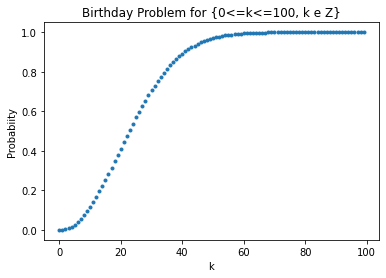

In [ ]:
n = 365
k = 100
prob_B = np.zeros(shape=(k,1))

for ii in range(0,k):
  # loop for each k val
  total_number_of_possibilites = n**ii
  # setup for w/o replacement equation
  temp = 1
  for i in range(0,ii):
    # the loop starts from 0 and goes up to k-1, thus fulfilling the formula
    temp = temp*(n-i)

    # calcs P(A)=1-P(B)
  prob_B[ii] = temp/total_number_of_possibilites 

prob_A = 1- prob_B
plt.scatter(np.arange(0,k), prob_A, marker='.')
plt.xlabel("k")
plt.ylabel("Probabiity")
plt.title("Birthday Problem for {0<=k<=100, k e Z}")

## Adjusting for Overcounting
In some cases this is necessary, where we want to determine the number of possibilities where differently order cases consisting of the same individuals count as one, for example: {A,B}={B,A}.

### Committees and Teams Example
Consider 4 people. \
a) # of ways to choose a two person commitee? \
b) # of ways to choose 2 teams of two? \

a) Sample w/o replacement multiplicative rule and then divide by 2 because: \
AB, ~BA~, ~CA~, ~DA~,  
AC, BC, ~CB~, ~DB~, \
AD, BD, CD, ~DC~, 

Thus: $[(4-1+1)(4-2+1)]/2=[4*3]/2=6$

b) Can specify team 1, thus team 2 falls into place. However, given team 1 (see above as well) AB & CD = CD & AB. This means we should divide by 2 again, giving 3 possibilities. 

## Binomial Coefficient
They count the number of subsets of a certain size for a set. For example, choosing a comitte of size _k_ a set of _n_ people. Here we choose _k ojects_ out of _n_, without replacement and without distinguishing order.\
__Sets and subsets are by definition unordered.__ Thus, {3,1,4}={4,1,3}. \
For nonnegative integers _k_ and _n_, the bi-coeff, combination or _n choose k_, is the number of subsets of size _k_ for a set of size _n_. 

\begin{equation}
  \begin{pmatrix}
  n\\
  k
  \end{pmatrix}
\end{equation}

For example __a__ above, 
\begin{equation}
  \begin{pmatrix}
  4\\
  2 
  \end{pmatrix} = 6
\end{equation}

### Binomial Coefficient Formula

For $k\leq n$:
\begin{equation}
  \begin{pmatrix}
  n\\
  k 
  \end{pmatrix} = \frac{n(n-1)...(n-1+k)}{k!} =\frac{n!}{(n-k)!k!}
\end{equation}
For $k>n$:
\begin{equation}
  \begin{pmatrix}
  n\\
  k 
  \end{pmatrix} = 0
\end{equation}


### Proving the Binomial Coefficient Formula
Let __A__ ve a set with $|A|=n$. Thus, for $k>n$, _n choose k_ is 0. If $k\leq n$, by Theorem \ref{eq:SampleWOReplace}, there are $n(n-1)...(n-k+1)$ ways to make an _ordered_ choice of _k_ elements w/o replacement. But this __overcounts__ each subset by a factor of $k!$ (sinze we don't care how these elements are ordered). Dividing by $k!$ will give the correct count. \
If we __care about ordering__ there are more possibilities because $AB\neq BA$. If we __do care about ordering__, there are fewer possibilities because $AB=BA$, thus we divide to remove the duplicates. \\

### Club Officers Example
In a club with _n_ people we must choose 3 officers w/o a title or 3 for the roles of president, vice-president and treasurer. (Thus $k=3$).\
__(1)__ Choosing P, VP & T:  
\begin{equation}
  n(n-1)(n-2)
\end{equation}
__(2)__ Choosing 3:  
\begin{equation}
  \begin{pmatrix}
  n\\
  3 
  \end{pmatrix} = \frac{n(n-1)(n-2)}{3!}
\end{equation}
In (1) the order matters, so there are more unique possibilites. In (2) the order does not matter, so there are fewer unique possibilites. For instance Joe, James and Jennifer are chosen. In (1) Joe can be the P, VP, or T with James and Jennifer taking up the other positions. However in (2) as long as Joe, James and Jennifer are chosen, the outcome is the same; thus there are fewer _unique_ possibilities.

### Permutations of a Word Example
How many ways can wee permutate LALALAAA? \

There are 5 A's and 3 L's, taking up 8 total number of slots. To determine the number of possibilities we can either determine which slots the 5 A's take up or which slots the 3 L's take up. Thus, the letter does not matter but the slot position does. We have 8 slots so $n=8$. We can either choose 5 or 3 positions for the A's and L's respectively, thus $k=5 or 3$. We use binomial coeff because the slot number matters but the letters are all the same, so whether A falls in slot 1,2,3,4,5 or 5,3,2,4,1 does not matter.
\begin{equation}
  \begin{pmatrix}
  8\\
  5 
  \end{pmatrix} = \frac{8!}{(8-5)5!}=
  \begin{pmatrix}
  8\\
  3 
  \end{pmatrix} = \frac{8!}{(8-3)3!}=
  \frac{8*7*6}{3!}=56 permutations
\end{equation}

### Full House in Poker Example
5 card hand, with 3 of 1 kind and 2 of another. In total, there are 5 cards to be given from the 52 card list. They are unordered, thus the total number of cards possible is $\begin{pmatrix} 52\\ 5 \end{pmatrix}$. \
For the set of 3, there are 4 possible cards: C D H S, where the order does not matter, thus $\begin{pmatrix} 4\\ 3 \end{pmatrix} = \frac{4!}{(4-3)(3!)}$ and for the set of 2: $\begin{pmatrix} 4\\ 2 \end{pmatrix} = \frac{4!}{(4-2)(2!)}$. In the card list, there are 13 types. If wee first select the 3 set, and then the 2 set we have 13 options for the 3 set and 12 for the 2 set. Thus:
\begin{equation}
P(full house)=\frac{13 \begin{pmatrix} 
                          4\\ 
                          3 
                        \end{pmatrix} 12 
                        \begin{pmatrix} 
                          4\\ 
                          2 
                        \end{pmatrix}}{ \begin{pmatrix} 
                          52\\ 
                          5 
                        \end{pmatrix}}=\frac{3744}{2598960}\approx 0.00144
\end{equation}

## Story Proofs
Proof by _interpretation_, towards explaining why the result is true. 

### The Team Captain Example
For $k\leq n$, positive integer
\begin{equation}
  n\begin{pmatrix}
    n-1\\
    k-1
  \end{pmatrix}=
  k\begin{pmatrix}
    n\\
    k
  \end{pmatrix}
\end{equation}
because $m!-m(m-1)!$. However, telling a story may be more insightful. \

Given a ggroup of _n_ people, from which a team of _k_ people are chosen with 1 being a team captain. We couuld either first choose the team captain and then the team (left) of the team then the team captain (right). \
Left: Use binomial coeff to choose the unordered commitee  w/o replacement. So first, # of ways of choosing the team captain is _n_, then the rest. \
Right: Binomial Coeff for the team, then out of the team of _k_ members, one is the captain. 

### Vandermonde's Identity
\begin{equation}
  \begin{pmatrix}
    m+n\\
    k
  \end{pmatrix}=\sum_{j=0}^{k}
  \begin{pmatrix}
    m\\
    j
  \end{pmatrix}
  \begin{pmatrix}
    n\\
    k-j
  \end{pmatrix}
\end{equation}
Consider a group of _m_ peacocks and _n_ toucans. From these, a set of _k_ birds will be chosen. There are $\begin{pmatrix} m+n\\ k \end{pmatrix}$ possibilites for this set of birds. In the chosen set, if there are _j_ peacocks, there must be _k-j_ toucans. The RHS of the identity, _sums up_ the cases for _j_. There are multiple ratios of peacocks to toucans, so the summation sums all of these ratio possibilities up, which gives the usual binomial coeff equation for _n choose k_. If you are given the peacocks and toucans, the LHS shows how to just the _k_ sized subset from all of the birds, whille the RHS shows the ratio for each.  

## General Definition of Probability. 
The _naive definition_ is limited because of its inability to handle infinite sample spaces and its requirement for all outcome to be equally likely. To generalise the definition of probability, 2 axioms are required. 

### General Definition
A probability space consists of a sample space $S$ and a probability function $P$ which takes an event $A\subseteq S$ as an input and returns $P(A)$, a real number between 0 and 1, as an output. The function $P$ must satisfy the following axioms: \
\begin{equation} 
  P(\emptyset)=0, P(S)=1
\end{equation}
If $A_1, A_2,...$ are _disjoint_ events, then
\begin{equation} 
  P(\cup_{j=1}^{\infty}A_j)= \sum_{j=1}^{\infty}P(A_j)
\end{equation}

** _Disjoint_: The events (in this case $A_1, A_2,...$) are _mututally exclusive_: $A_i \cap A_j=\emptyset$ for $i \neq j$. \

For the second rule, it states that the probability of at least one of those events occuring is equal to the sum of all their probabilities. This makes sense because if you imagine a square space with a number of circular events within it (mutually exclusive or disjoint), the probability of at least one occuring is the sum of all the probabilites of each one.

#### Mass
Considering an sample space full of pebbles. The total mass of all is 1 and an none is 0. Adding the masses in disjiont piles gives the probability. Here, there can be piles of differing mass, unlike the naive case (total is always 1).

### Interpretation of the Axioms
Any function $P$ maping events to an interval $[0,1]$ that also satifies the 2 axioms is a valid probability function. However, tThe axoims do not tell one how to interpret. 
#### Frequentist
% represents a long-run frequency over a large number of repitions. For instancce, a coin has a % of $\frac{1}{2}$, meaning the the coin would land on heads or tails 50% of the time.
#### Bayesian
% represent a _degree of belief_ about the event in question, even if repeating the event is not possible. 

### Properties of Probability
For any events $A$ and $B$
\begin{equation}
  P(A^c)=1-P(A)
\end{equation}
\begin{equation}
  \text{If } A \subseteq B \text{, then } P(A) \leq P(B)
\end{equation}
\begin{equation}
  P(A \cup B) = P(A)+P(B)-P(A\cap B)
\end{equation}
#### Proofs
For the First: \
$A$ and $A^c$ are disjoint and their union is $S$. The second axiom gives 
\begin{equation}
  P(S)=P(A\cup A^c)=P(A)+P(A^c)
\end{equation}
with $P(S)=1$ by the first axiom. \
\
For the Second: \
If $A\subseteq B$, $B$ can be written as $A \cup (B\cap A^c)$. Think Venn diagram of the events. Since $A$ and $B\cap A^c$ are disjoint, the second axoim can be applied giving:
\begin{equation}
  P(B)=P(A\cup (B\cap A^c))=P(A)P(B\cap A^c)
\end{equation}
% is nonnegative, so $P(B\cap A^c)\geq 0$, thus proving that $P(B)\geq P(A)$.\
\
For the Third: \
Think again using the Venn diagrams. Adding two probabilites however, means adding the intersection twice, so it must be subtracted once. For the proof: \
Again, think of $A\cup B$ as the union of two disjoint events. Using the second axiom, we get
\begin{equation}
  P(A\cup B)= P(A\cup (B\cap A^c))=P(A)+P(B\cap A^c)
\end{equation}
Thus, from above and the rule, it can be seen that $P(B\cap A^c)$ should equal $P(B)-P(A\cap B)$.
Furthermore, using axiom 2 again,
\begin{equation}
  P(A\cap B)+P(B\cap A^c)=P(B)
\end{equation}
because $A\cap B$ and $B\cap A^c$ are disjoint events. Shuffling the above, it can be shown that $P(B\cap A^c)=P(B)-P(A\cap B)$.  \
\
This third propery is a special case of _inclusion-exclsuion_, which is a formula for finding the probability of a union of events when the events are not necessarily disjoint. \
\
#### Inclusion-Exclusion Theorem
For any events $A_1,...A_n$,
\begin{equation}
  P(\cup _{i=1}^{n}A_i)=\sum _i P(A_i)-\sum _{i<j}P(A_i\cap A_j)+
  \sum _{i<j<k}P(A_i\cap A_j \cap A_k)-...+(-1)^{n+1}P(A_1,...,A_n)
\end{equation}



## de Montmort's Matching Problem
Consider a well-shuffled deck of _n_ cards, labeled 1 through _n_. You flip over the cards one by one, saying the numbers 1 through _n_ as you do so. You win the game if, at some point, the number you say aloud is the same as the number on the card being flipped over (for example, if the 7th card in the deck has the label 7). What is the probability of winning? \

### Solution
When considering this problem, we have the % that _only one_ is in the correct position, or _two_ or _three_ up to all. The concept of _inclusion-exclusion_ is present. Consider two events, one with 1 and the other with 2 cards in the correct positions, the latter having one of its cards the same as the formerr event. The second event is a subset of the first.\
\
Consider that each guessed number should be said only once. An option is to count through the revealed cards (which is done considered here in the problem statement). Consider $A_i$ as the event that the _i_th card has the _i_th number written on it. The probability of interest is the probability of the union of $A_1\cup ... \cup A_n$ : as long as at least one of the cards has a number matching its position in the deck, the game is won. \
\
First, by the _naive_ definition of % or symmetry:
\begin{equation}
  P(A_i)=\frac{1}{n}
\end{equation}
Using the _naive_ definition: there are $n!$ orderings of the deck, because position one has $n$ possibilities, position 2, $n-1$ and so on. Fixing the event $A_i$, the other $(n-1)$ card slots have $(n-1)!$ possibilities. Thus, 
\begin{equation}
  P(A_i)=\frac{(n-1)!}{n!}=\frac{1}{n}.
\end{equation}
Using the _symmetry_ definition: card _i_ is equally likely to be in any spot, so has the % $1/n$ of being in the _i_th spot. \

Next, we consider the case of 2 cards being in the correct positions:
\begin{equation}
  P(A_i\cap A_j)=\frac{(n-2)!}{n!}=\frac{1}{n(n-1)}
\end{equation}
Similarly,
\begin{equation}
  P(A_i\cap A_j\cap A_k)=\frac{(n-3)!}{n!}=\frac{1}{n(n-1)(n-2)}
\end{equation}
The pattern continues for the intersection of more events.\
\
 